In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy

In [2]:
# Estilo geral dos gráficos
plt.style.use('default')

# Configurações globais do Matplotlib
plt.rcParams.update({
    'figure.figsize': (10, 6),          # tamanho padrão das figuras
    'axes.titlesize': 16,               # tamanho do título
    'axes.labelsize': 13,               # tamanho dos rótulos dos eixos
    'axes.titleweight': 'bold',         # título em negrito
    'axes.labelweight': 'medium',
    'axes.edgecolor': '#333333',        # cor das bordas dos eixos
    'axes.grid': True,                  # ativa a grade
    'grid.alpha': 0.3,                  # transparência da grade
    'grid.color': '#aaaaaa',
    'lines.linewidth': 2,               # espessura das linhas
    'lines.markersize': 6,
    'font.size': 12,                    # tamanho padrão da fonte
    'font.family': 'sans-serif',
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'legend.frameon': False,            # remove a caixa da legenda
    'figure.autolayout': True,          # ajusta automaticamente margens
    'figure.facecolor': 'white',        # cor de fundo do gráfico
    'axes.facecolor': '#f9f9f9',        # cor de fundo dos eixos
})

# Tema padrão do Seaborn (harmoniza com o Matplotlib)
sns.set_theme(
    style="whitegrid",
    palette="deep",                     # cores elegantes e equilibradas
    font_scale=1.1
)

In [4]:
df = pd.read_csv('..\data\Obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [6]:
df.shape

(2111, 17)

### Tratamento dos dados

In [7]:
column_name = {
    'Gender': 'sexo',
    'Age': 'idade',
    'Height': 'altura',
    'Weight': 'peso',
    'family_history': 'hist_familiar_obes',
    'FAVC': 'cons_altas_cal_freq',
    'FCVC': 'cons_verduras',
    'NCP': 'refeicoes_principais_dia',
    'CAEC': 'lancha_entre_ref',
    'SMOKE': 'fuma',
    'CH2O': 'agua_dia',
    'SCC': 'controle_calorias',
    'FAF': 'ativ_fisica',
    'TUE': 'uso_tecnologia',
    'CALC': 'cons_alcool',
    'MTRANS': 'transporte',
    'Obesity': 'nivel_obesidade'
}


In [8]:
# Renomear colunas
df = df.rename(columns=column_name).copy()
df

,sexo,idade,altura,peso,hist_familiar_obes,cons_altas_cal_freq,cons_verduras,refeicoes_principais_dia,lancha_entre_ref,fuma,agua_dia,controle_calorias,ativ_fisica,uso_tecnologia,cons_alcool,transporte,nivel_obesidade
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [9]:
# Substituir valores categoricos por numeréricos.
colunas_vals_yes_no = ['hist_familiar_obes', 'cons_altas_cal_freq', 'fuma', 'controle_calorias']

for col in colunas_vals_yes_no:
    for val_col in df.columns:
        if val_col == col:
            df[val_col] = df[col].map({'yes' : 1, 'no' : 0}).copy()

df['sexo'] = df['sexo'].map({'Female' : 0, 'Male' : 1})
df

,sexo,idade,altura,peso,hist_familiar_obes,cons_altas_cal_freq,cons_verduras,refeicoes_principais_dia,lancha_entre_ref,fuma,agua_dia,controle_calorias,ativ_fisica,uso_tecnologia,cons_alcool,transporte,nivel_obesidade
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [11]:
# Converte e arredonda colunas de formato float para int
# Lista de colunas a ser convertida
coluna_converter = ['idade', 'cons_verduras', 'refeicoes_principais_dia', 'ativ_fisica', 'uso_tecnologia']

# Variaveis arredondadas sem casa depois da virgula
df[coluna_converter] = df[coluna_converter].round()

# Variável agua_dia arredonda com uma casa depois da virgula
df['agua_dia'] = df['agua_dia'].round()
df['agua_dia'] = df['agua_dia'].astype(int)

# Variável altura e peso arredonda com uma casa depois da virgula
df[['altura', 'peso']] = df[['altura', 'peso']].round(2)

# Transfomar colunas float em int
df['idade'] = df['idade'].astype(int)
df['cons_verduras'] = df['cons_verduras'].astype(int)
df['refeicoes_principais_dia'] = df['refeicoes_principais_dia'].astype(int)
df['ativ_fisica'] = df['ativ_fisica'].astype(int)
df['uso_tecnologia'] = df['uso_tecnologia'].astype(int)

df

,sexo,idade,altura,peso,hist_familiar_obes,cons_altas_cal_freq,cons_verduras,refeicoes_principais_dia,lancha_entre_ref,fuma,agua_dia,controle_calorias,ativ_fisica,uso_tecnologia,cons_alcool,transporte,nivel_obesidade
0,0,21,1.62,64.00,1,0,2,3,Sometimes,0,2,0,0,1,no,Public_Transportation,Normal_Weight
1,0,21,1.52,56.00,1,0,3,3,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.80,77.00,1,0,2,3,Sometimes,0,2,0,2,1,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.80,87.00,0,0,3,3,Sometimes,0,2,0,2,0,Frequently,Walking,Overweight_Level_I
4,1,22,1.78,89.80,0,0,2,1,Sometimes,0,2,0,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3,3,Sometimes,0,2,0,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,22,1.75,133.74,1,1,3,3,Sometimes,0,2,0,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,23,1.75,133.69,1,1,3,3,Sometimes,0,2,0,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24,1.74,133.35,1,1,3,3,Sometimes,0,3,0,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [10]:
df['nivel_obesidade'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

### Criando variéveis target obesidade e nivel_altura.

## 🧍‍♂️ Classificação de Estatura (Altura)

A tabela abaixo apresenta as faixas de estatura mais utilizadas para adultos, com base em referências médias brasileiras e internacionais (IBGE e OMS).

| **Categoria**       | **Altura (m)** | **Descrição** |
|----------------------|----------------|----------------|
| Muito baixa          | < 1.50         | Considerada baixa estatura para adultos |
| Baixa                | 1.50 – 1.59    | Abaixo da média |
| Estatura média       | 1.60 – 1.74    | Faixa mais comum entre adultos |
| Alta                 | 1.75 – 1.89    | Acima da média |
| Muito alta           | ≥ 1.90         | Estatura elevada |

### 📈 Médias de Altura no Brasil (IBGE)

| **Sexo** | **Altura média (m)** |
|-----------|----------------------|
| Homens    | 1.73                 |
| Mulheres  | 1.60                 |


In [12]:
# Função para classificar altura
def classificar_estatura(altura):
    if altura < 1.50:
        return 'Muito_Baixa'
    elif altura < 1.60:
        return 'Baixa'
    elif altura < 1.75:
        return 'Estatura_Media'
    elif altura < 1.90:
        return 'Alta'
    else:
        return 'Muito_Alta'

# Cria variavel de nivel de altura
df['nivel_estatura'] = df['altura'].copy().apply(classificar_estatura)


## 🧮 Cálculo do IMC (Índice de Massa Corporal)

A fórmula utilizada para avaliar o grau de obesidade é:

$$
IMC = \frac{peso\ (kg)}{(altura\ (m))^2}
$$

### 📊 Classificação segundo a OMS

| Categoria             | IMC (kg/m²)         |
|------------------------|--------------------|
| Abaixo do peso         | Menor que 18,5     |
| Peso normal            | 18,5 – 24,9        |
| Sobrepeso              | 25,0 – 29,9        |
| Obesidade grau I       | 30,0 – 34,9        |
| Obesidade grau II      | 35,0 – 39,9        |
| Obesidade grau III     | 40,0 ou mais       |

### 🧍‍♂️ Exemplo de cálculo

Para uma pessoa com **90 kg** e **1,75 m** de altura:

$$
IMC = \frac{90}{1,75^2} = \frac{90}{3,0625} \approx 29,4
$$

📈 **Resultado:** 29,4 → **Sobrepeso**

In [13]:
# Criação do mapeamento dos níveis detalhados para os 4 principais grupos
mapa_obesidade = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 0,
    'Overweight_Level_I': 0,
    'Overweight_Level_II': 0,
    'Obesity_Type_I': 1,
    'Obesity_Type_II': 1,
    'Obesity_Type_III': 1
}

# Cria a nova coluna 'target_obesidade'
df['target_obesidade'] = df['nivel_obesidade'].map(mapa_obesidade)

In [13]:
df.sort_values(by=['peso'], ascending=False)

,sexo,idade,altura,peso,hist_familiar_obes,cons_altas_cal_freq,cons_verduras,refeicoes_principais_dia,lancha_entre_ref,fuma,agua_dia,controle_calorias,ativ_fisica,uso_tecnologia,cons_alcool,transporte,nivel_obesidade,nivel_estatura,target_obesidade
344,1,18.0,1.87,173.00,1,1,3.0,3.0,Frequently,0,2.0,0,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,Alta,1
502,0,22.0,1.84,165.06,1,1,3.0,3.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Obesity_Type_III,Alta,1
1898,0,19.0,1.79,160.94,1,1,3.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,Alta,1
1910,0,22.0,1.80,160.64,1,1,3.0,3.0,Sometimes,0,2.0,0,0.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,Alta,1
1838,0,21.0,1.81,155.87,1,1,3.0,3.0,Sometimes,0,2.0,0,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III,Alta,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0,19.0,1.57,39.85,0,1,1.0,2.0,Sometimes,0,1.0,0,1.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight,Baixa,0
636,0,19.0,1.56,39.70,0,1,2.0,2.0,Sometimes,0,2.0,0,2.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight,Baixa,0
589,0,20.0,1.53,39.37,0,1,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Sometimes,Public_Transportation,Insufficient_Weight,Baixa,0
725,0,20.0,1.54,39.10,0,1,1.0,3.0,Sometimes,0,2.0,0,2.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight,Baixa,0


### **(EDA)** Análise Exploratória de Dados

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sexo                      2111 non-null   int64  
 1   idade                     2111 non-null   float64
 2   altura                    2111 non-null   float64
 3   peso                      2111 non-null   float64
 4   hist_familiar_obes        2111 non-null   int64  
 5   cons_altas_cal_freq       2111 non-null   int64  
 6   cons_verduras             2111 non-null   float64
 7   refeicoes_principais_dia  2111 non-null   float64
 8   lancha_entre_ref          2111 non-null   object 
 9   fuma                      2111 non-null   int64  
 10  agua_dia                  2111 non-null   float64
 11  controle_calorias         2111 non-null   int64  
 12  ativ_fisica               2111 non-null   float64
 13  uso_tecnologia            2111 non-null   float64
 14  cons_alc

In [15]:
# Análise Estatística básica
df.describe()

,sexo,idade,altura,peso,hist_familiar_obes,cons_altas_cal_freq,cons_verduras,refeicoes_principais_dia,fuma,agua_dia,controle_calorias,ativ_fisica,uso_tecnologia,target_obesidade
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.315964,1.701620,86.586035,0.817622,0.883941,2.423496,2.687826,0.020843,2.014685,0.045476,1.006632,0.664614,0.460445
std,0.500083,6.357078,0.093368,26.191163,0.386247,0.320371,0.583905,0.809680,0.142893,0.688616,0.208395,0.895462,0.674009,0.498551
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,1.630000,65.470000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,23.000000,1.700000,83.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,26.000000,1.770000,107.430000,1.000000,1.000000,3.000000,3.000000,0.000000,2.000000,0.000000,2.000000,1.000000,1.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000,1.000000


In [16]:
# Dados nulos
df.isnull().sum()

sexo                        0
idade                       0
altura                      0
peso                        0
hist_familiar_obes          0
cons_altas_cal_freq         0
cons_verduras               0
refeicoes_principais_dia    0
lancha_entre_ref            0
fuma                        0
agua_dia                    0
controle_calorias           0
ativ_fisica                 0
uso_tecnologia              0
cons_alcool                 0
transporte                  0
nivel_obesidade             0
nivel_estatura              0
target_obesidade            0
dtype: int64

In [17]:
# Observação dos valores unicos dentro das variáveis.
for cols in (df):
    print(f'Colunas {cols}\n{df[cols].unique()}\n')

Colunas sexo
[0 1]

Colunas idade
[21. 23. 27. 22. 29. 24. 26. 41. 30. 52. 20. 19. 31. 39. 17. 25. 55. 38.
 18. 15. 61. 44. 34. 36. 32. 35. 40. 45. 33. 51. 56. 28. 16. 37. 14. 42.
 43. 46. 48. 47.]

Colunas altura
[1.62 1.52 1.8  1.78 1.5  1.64 1.72 1.85 1.65 1.77 1.7  1.93 1.53 1.71
 1.69 1.6  1.75 1.68 1.58 1.79 1.56 1.67 1.66 1.81 1.82 1.55 1.61 1.63
 1.76 1.57 1.88 1.87 1.89 1.74 1.83 1.92 1.73 1.84 1.91 1.48 1.59 1.54
 1.9  1.86 1.45 1.98 1.51 1.46 1.49 1.95 1.94]

Colunas peso
[ 64.    56.    77.   ... 131.41 133.69 133.35]

Colunas hist_familiar_obes
[1 0]

Colunas cons_altas_cal_freq
[0 1]

Colunas cons_verduras
[2. 3. 1.]

Colunas refeicoes_principais_dia
[3. 1. 4. 2.]

Colunas lancha_entre_ref
['Sometimes' 'Frequently' 'Always' 'no']

Colunas fuma
[0 1]

Colunas agua_dia
[2. 3. 1.]

Colunas controle_calorias
[0 1]

Colunas ativ_fisica
[0. 3. 2. 1.]

Colunas uso_tecnologia
[1. 0. 2.]

Colunas cons_alcool
['no' 'Sometimes' 'Frequently' 'Always']

Colunas transporte
['Public_Tra

In [18]:
# Quantidade de nivéis de obsedidade
df.target_obesidade.value_counts().sort_values(ascending=False)

target_obesidade
0    1139
1     972
Name: count, dtype: int64

In [19]:
# Percentaual de obsedidade
round(df.target_obesidade.value_counts(normalize=True).sort_values(ascending=False) * 100, 2)

target_obesidade
0    53.96
1    46.04
Name: proportion, dtype: float64

In [20]:
# Quantidade de nível de obesidade por genero
df.groupby('target_obesidade')['sexo'].value_counts().reset_index()

,target_obesidade,sexo,count
0,0,1,577
1,0,0,562
2,1,1,491
3,1,0,481


In [21]:
# Quantidade de nível de obesidade por genero
round(df.groupby('target_obesidade')['sexo'].value_counts(normalize=True) * 100, 2).reset_index()

,target_obesidade,sexo,proportion
0,0,1,50.66
1,0,0,49.34
2,1,1,50.51
3,1,0,49.49


In [22]:
# Quantidade de obesidade por idade por nível de obesidade
df.groupby('target_obesidade')['idade'].value_counts().reset_index().sort_index()

,target_obesidade,idade,count
0,0,21.0,152
1,0,18.0,147
2,0,19.0,134
3,0,20.0,116
4,0,23.0,109
...,...,...,...
63,1,43.0,2
64,1,15.0,1
65,1,16.0,1
66,1,47.0,1


In [23]:
# Quantidade de obesidade por idade por nível de obesidade
round(df.groupby('target_obesidade')['idade'].value_counts(normalize=True) * 100, 2).reset_index().sort_index()

,target_obesidade,idade,proportion
0,0,21.0,13.35
1,0,18.0,12.91
2,0,19.0,11.76
3,0,20.0,10.18
4,0,23.0,9.57
...,...,...,...
63,1,43.0,0.21
64,1,15.0,0.10
65,1,16.0,0.10
66,1,47.0,0.10


In [24]:
# Média de idade por nível de obesidade
df.groupby('target_obesidade')['idade'].mean().round().sort_index()

target_obesidade
0    23.0
1    26.0
Name: idade, dtype: float64

In [25]:
df.groupby('target_obesidade')['altura'].value_counts().reset_index().sort_values(by=['target_obesidade', 'altura'], ascending=False)

,target_obesidade,altura,count
91,1,1.98,2
94,1,1.95,1
93,1,1.94,1
90,1,1.93,2
88,1,1.92,3
...,...,...,...
34,0,1.50,14
41,0,1.49,3
40,0,1.48,3
46,0,1.46,1


In [26]:
# Quantidade de obesidade por idade por nível de obesidade
round(df.groupby('target_obesidade')['altura'].value_counts(normalize=True) * 100, 2).reset_index().sort_index()

,target_obesidade,altura,proportion
0,0,1.70,8.34
1,0,1.72,4.92
2,0,1.60,4.83
3,0,1.75,4.65
4,0,1.65,4.48
...,...,...,...
90,1,1.93,0.21
91,1,1.98,0.21
92,1,1.90,0.10
93,1,1.94,0.10


In [27]:
# Média de altura por nível de obesidade
df.groupby('target_obesidade')['altura'].mean().round(2).sort_index()

target_obesidade
0    1.69
1    1.72
Name: altura, dtype: float64

In [28]:
# Obesidade por nivel de estatura
df.groupby('target_obesidade')['nivel_estatura'].value_counts().reset_index().sort_values(by=['target_obesidade', 'count'], ascending=False)

,target_obesidade,nivel_estatura,count
5,1,Estatura_Media,470
6,1,Alta,415
7,1,Baixa,67
8,1,Muito_Alta,20
0,0,Estatura_Media,611
1,0,Alta,325
2,0,Baixa,184
3,0,Muito_Alta,11
4,0,Muito_Baixa,8


In [29]:
round(df.groupby('target_obesidade')['nivel_estatura'].value_counts(normalize=True) * 100, 2).reset_index().sort_values(by=['target_obesidade', 'proportion'], ascending=False)

,target_obesidade,nivel_estatura,proportion
5,1,Estatura_Media,48.35
6,1,Alta,42.70
7,1,Baixa,6.89
8,1,Muito_Alta,2.06
0,0,Estatura_Media,53.64
1,0,Alta,28.53
2,0,Baixa,16.15
3,0,Muito_Alta,0.97
4,0,Muito_Baixa,0.70


In [30]:
# Média do peso por nível de obesidade
df.groupby('target_obesidade')['peso'].mean().round(2).sort_values(ascending=False)

target_obesidade
1    109.08
0     67.39
Name: peso, dtype: float64

In [31]:
# Histórico familiar que teve obesidade por nível de obesidade
df.groupby('target_obesidade')['hist_familiar_obes'].value_counts().reset_index().sort_index()

,target_obesidade,hist_familiar_obes,count
0,0,1,762
1,0,0,377
2,1,1,964
3,1,0,8


In [32]:
# Histórico familiar que teve obesidade por nível de obesidade
round(df.groupby('target_obesidade')['hist_familiar_obes'].value_counts(normalize=True) * 100, 2).reset_index().sort_index()

,target_obesidade,hist_familiar_obes,proportion
0,0,1,66.90
1,0,0,33.10
2,1,1,99.18
3,1,0,0.82


In [33]:
# Quantidade de nível de obesidade de quem consome mais calorias frequentemente
df.groupby('target_obesidade')['cons_altas_cal_freq'].value_counts().reset_index()

,target_obesidade,cons_altas_cal_freq,count
0,0,1,913
1,0,0,226
2,1,1,953
3,1,0,19


In [34]:
# Quantidade de nível de obesidade de quem consome mais calorias frequentemente
round(df.groupby('target_obesidade')['cons_altas_cal_freq'].value_counts(normalize=True) * 100, 2).reset_index()

,target_obesidade,cons_altas_cal_freq,proportion
0,0,1,80.16
1,0,0,19.84
2,1,1,98.05
3,1,0,1.95


In [35]:
# Quantidade de nível de obesidade de quem consome verduras nas refeições
df.groupby('target_obesidade')['cons_verduras'].value_counts().reset_index()

,target_obesidade,cons_verduras,count
0,0,2.0,619
1,0,3.0,456
2,0,1.0,64
3,1,3.0,540
4,1,2.0,394
5,1,1.0,38


In [36]:
# Quantidade de nível de obesidade de quem consome verduras nas refeições
round(df.groupby('target_obesidade')['cons_verduras'].value_counts(normalize=True) * 100, 2).reset_index()

,target_obesidade,cons_verduras,proportion
0,0,2.0,54.35
1,0,3.0,40.04
2,0,1.0,5.62
3,1,3.0,55.56
4,1,2.0,40.53
5,1,1.0,3.91


In [37]:
# Quantidade de refeiçoes por dia por nível de obesidade
df.groupby('target_obesidade')['refeicoes_principais_dia'].value_counts().reset_index()

,target_obesidade,refeicoes_principais_dia,count
0,0,3.0,693
1,0,1.0,213
2,0,4.0,140
3,0,2.0,93
4,1,3.0,777
5,1,1.0,103
6,1,2.0,83
7,1,4.0,9


In [38]:
# Quantidade de refeiçoes por dia por nível de obesidade
round(df.groupby('target_obesidade')['refeicoes_principais_dia'].value_counts(normalize=True) * 100, 2).reset_index()

,target_obesidade,refeicoes_principais_dia,proportion
0,0,3.0,60.84
1,0,1.0,18.70
2,0,4.0,12.29
3,0,2.0,8.17
4,1,3.0,79.94
5,1,1.0,10.60
6,1,2.0,8.54
7,1,4.0,0.93


In [39]:
# Quantidade de nível de obesidade de quem lancha entre as refeições
df.groupby('target_obesidade')['lancha_entre_ref'].value_counts().reset_index()

,target_obesidade,lancha_entre_ref,count
0,0,Sometimes,811
1,0,Frequently,234
2,0,no,49
3,0,Always,45
4,1,Sometimes,954
5,1,Always,8
6,1,Frequently,8
7,1,no,2


In [40]:
# Quantidade de nível de obesidade de quem lancha entre as refeições
round(df.groupby('target_obesidade')['lancha_entre_ref'].value_counts(normalize=True) * 100, 2).reset_index()

,target_obesidade,lancha_entre_ref,proportion
0,0,Sometimes,71.20
1,0,Frequently,20.54
2,0,no,4.30
3,0,Always,3.95
4,1,Sometimes,98.15
5,1,Always,0.82
6,1,Frequently,0.82
7,1,no,0.21


In [41]:
# Quantidade de nível de obesidade de quem fuma
df.groupby('target_obesidade')['fuma'].value_counts().reset_index()

,target_obesidade,fuma,count
0,0,0,1117
1,0,1,22
2,1,0,950
3,1,1,22


In [42]:
# Quantidade de nível de obesidade de quem fuma
round(df.groupby('target_obesidade')['fuma'].value_counts(normalize=True) * 100, 2).reset_index()

,target_obesidade,fuma,proportion
0,0,0,98.07
1,0,1,1.93
2,1,0,97.74
3,1,1,2.26


In [43]:
# Consumo médio de água por nível de obesidade
df.groupby('target_obesidade')['agua_dia'].value_counts().reset_index().sort_values(by='agua_dia')

,target_obesidade,agua_dia,count
1,0,1.0,274
5,1,1.0,211
3,1,2.0,464
0,0,2.0,646
2,0,3.0,219
4,1,3.0,297


In [44]:
# Quantidade de nível de obesidade de quem controla as calorias diarias
df.groupby('target_obesidade')['controle_calorias'].value_counts().reset_index()

,target_obesidade,controle_calorias,count
0,0,0,1046
1,0,1,93
2,1,0,969
3,1,1,3


In [45]:
# Quantidade de nível de obesidade de quem controla as calorias diarias
round(df.groupby('target_obesidade')['controle_calorias'].value_counts(normalize=True) * 100, 2).reset_index()

,target_obesidade,controle_calorias,proportion
0,0,0,91.83
1,0,1,8.17
2,1,0,99.69
3,1,1,0.31


In [46]:
# Pratica atividade fisica por nível de obesidade
df.groupby('target_obesidade')['ativ_fisica'].value_counts().reset_index().sort_index()

,target_obesidade,ativ_fisica,count
0,0,1.0,420
1,0,0.0,333
2,0,2.0,292
3,0,3.0,94
4,1,0.0,387
5,1,1.0,356
6,1,2.0,204
7,1,3.0,25


In [47]:
# Pratica atividade fisica por nível de obesidade
round(df.groupby('target_obesidade')['ativ_fisica'].value_counts(normalize=True) * 100, 2).reset_index().sort_index()

,target_obesidade,ativ_fisica,proportion
0,0,1.0,36.87
1,0,0.0,29.24
2,0,2.0,25.64
3,0,3.0,8.25
4,1,0.0,39.81
5,1,1.0,36.63
6,1,2.0,20.99
7,1,3.0,2.57


In [48]:
# Utiliza tipos de dispositivo técnoliga no dia
df.groupby('target_obesidade')['uso_tecnologia'].value_counts().reset_index().sort_index()

,target_obesidade,uso_tecnologia,count
0,0,0.0,501
1,0,1.0,476
2,0,2.0,162
3,1,0.0,451
4,1,1.0,439
5,1,2.0,82


In [49]:
# Pratica atividade fisica por nível de obesidade
round(df.groupby('target_obesidade')['ativ_fisica'].value_counts(normalize=True) * 100, 2).reset_index().sort_index()

,target_obesidade,ativ_fisica,proportion
0,0,1.0,36.87
1,0,0.0,29.24
2,0,2.0,25.64
3,0,3.0,8.25
4,1,0.0,39.81
5,1,1.0,36.63
6,1,2.0,20.99
7,1,3.0,2.57


In [50]:
# Quantidade de nível de obesidade de quem consome alcool
df.groupby('target_obesidade')['cons_alcool'].value_counts().reset_index()

,target_obesidade,cons_alcool,count
0,0,Sometimes,682
1,0,no,402
2,0,Frequently,54
3,0,Always,1
4,1,Sometimes,719
5,1,no,237
6,1,Frequently,16


In [51]:
# Quantidade de nível de obesidade de quem consome alcool
round(df.groupby('target_obesidade')['cons_alcool'].value_counts(normalize=True) * 100, 2).reset_index()

,target_obesidade,cons_alcool,proportion
0,0,Sometimes,59.88
1,0,no,35.29
2,0,Frequently,4.74
3,0,Always,0.09
4,1,Sometimes,73.97
5,1,no,24.38
6,1,Frequently,1.65


In [52]:
# Quantidade de nível de obesidade e utiliza tipo de transporte
df.groupby('target_obesidade')['transporte'].value_counts().reset_index()

,target_obesidade,transporte,count
0,0,Public_Transportation,821
1,0,Automobile,251
2,0,Walking,53
3,0,Motorbike,8
4,0,Bike,6
5,1,Public_Transportation,759
6,1,Automobile,206
7,1,Motorbike,3
8,1,Walking,3
9,1,Bike,1


In [53]:
# Quantidade de nível de obesidade e utiliza tipo de transporte
round(df.groupby('target_obesidade')['transporte'].value_counts(normalize=True) * 100, 2).reset_index()

,target_obesidade,transporte,proportion
0,0,Public_Transportation,72.08
1,0,Automobile,22.04
2,0,Walking,4.65
3,0,Motorbike,0.70
4,0,Bike,0.53
5,1,Public_Transportation,78.09
6,1,Automobile,21.19
7,1,Motorbike,0.31
8,1,Walking,0.31
9,1,Bike,0.10


## Charts

In [54]:
df.head()

,sexo,idade,altura,peso,hist_familiar_obes,cons_altas_cal_freq,cons_verduras,refeicoes_principais_dia,lancha_entre_ref,fuma,agua_dia,controle_calorias,ativ_fisica,uso_tecnologia,cons_alcool,transporte,nivel_obesidade,nivel_estatura,target_obesidade
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,Estatura_Media,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,Baixa,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,Alta,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,Alta,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Alta,0


In [55]:
df.columns

Index(['sexo', 'idade', 'altura', 'peso', 'hist_familiar_obes',
       'cons_altas_cal_freq', 'cons_verduras', 'refeicoes_principais_dia',
       'lancha_entre_ref', 'fuma', 'agua_dia', 'controle_calorias',
       'ativ_fisica', 'uso_tecnologia', 'cons_alcool', 'transporte',
       'nivel_obesidade', 'nivel_estatura', 'target_obesidade'],
      dtype='object')

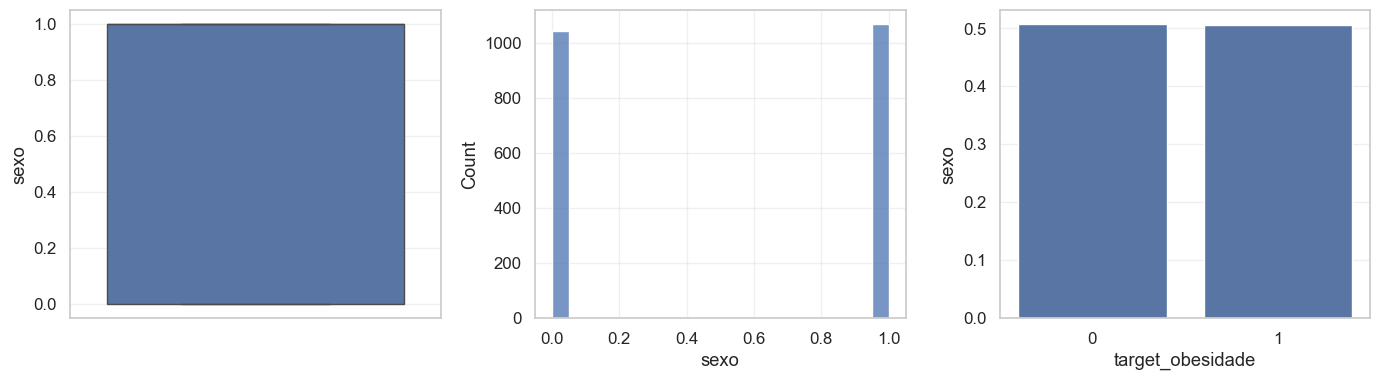

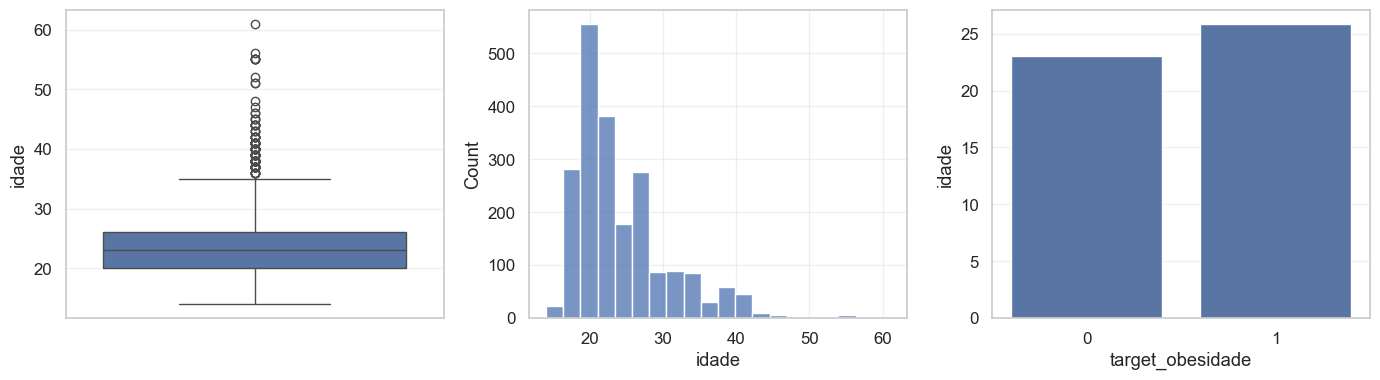

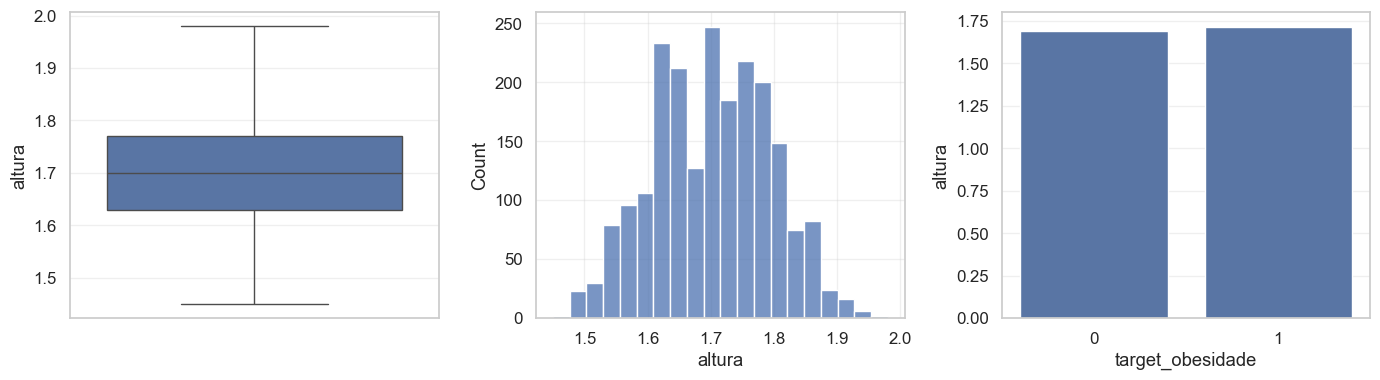

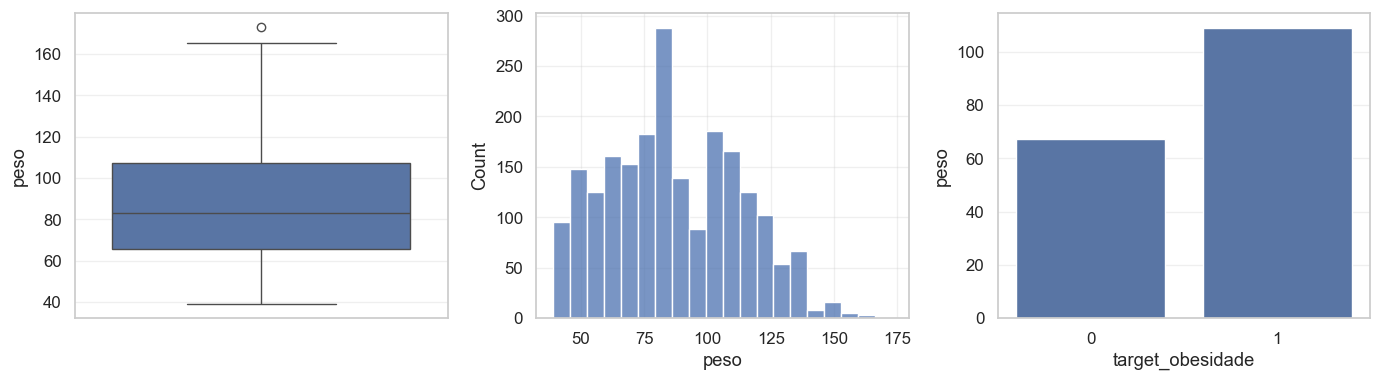

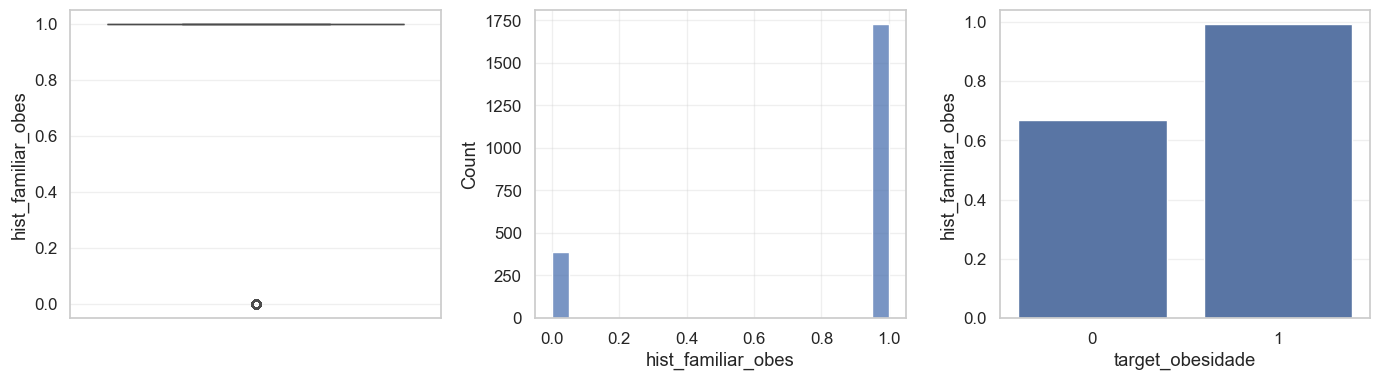

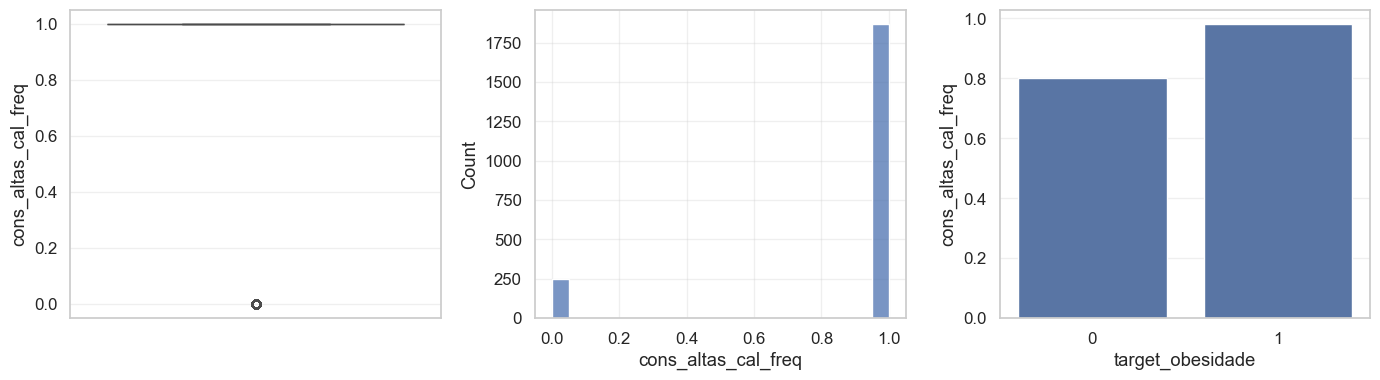

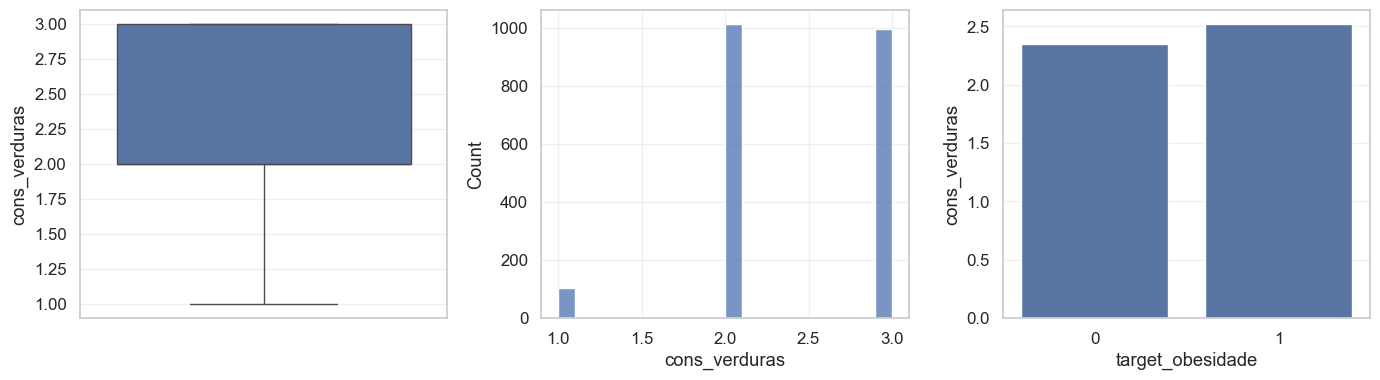

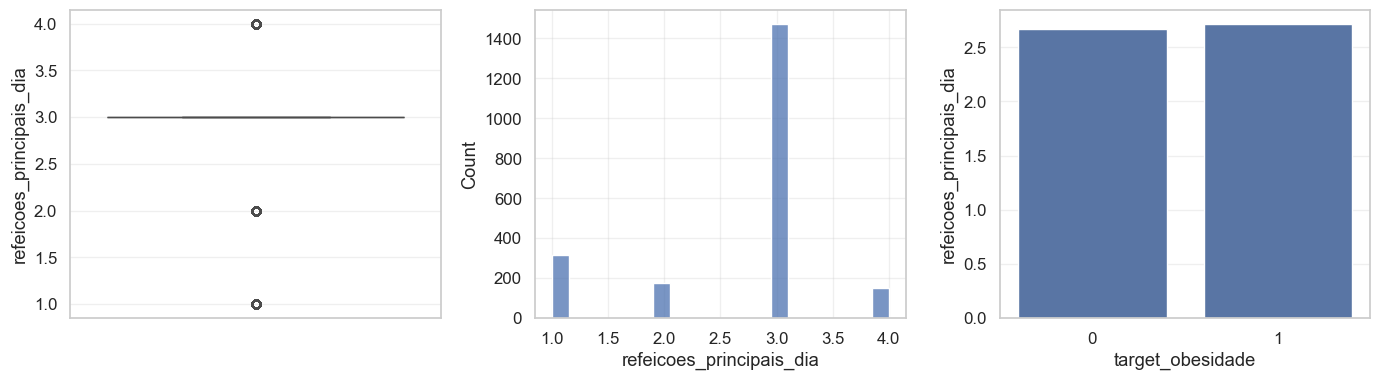

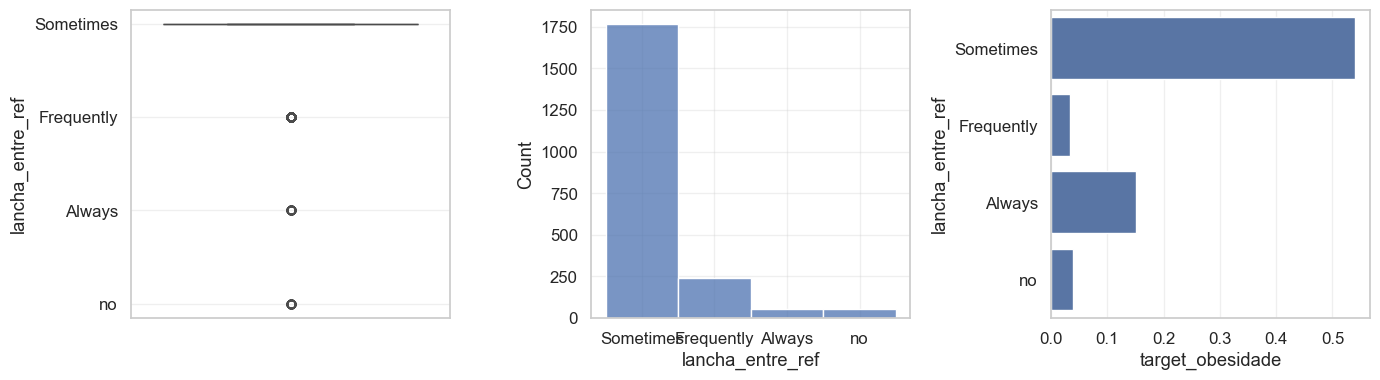

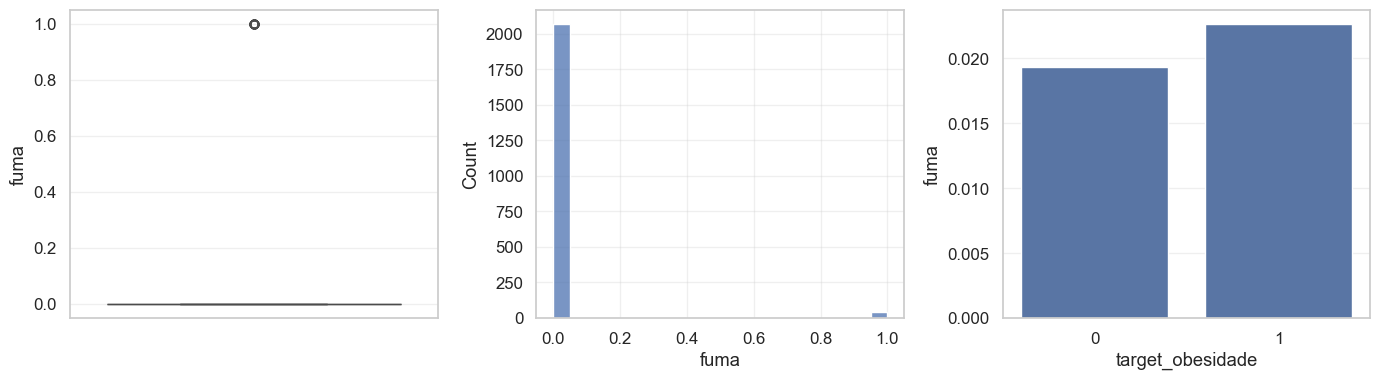

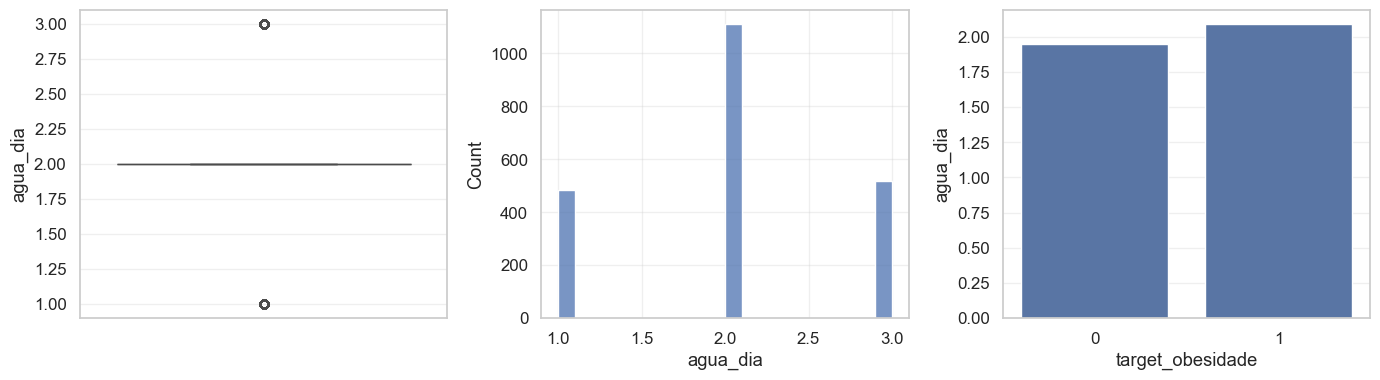

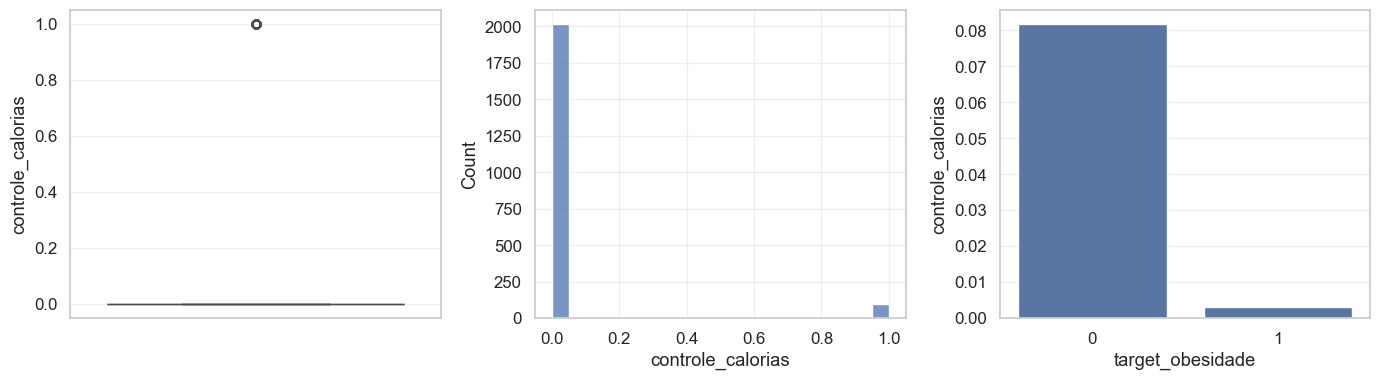

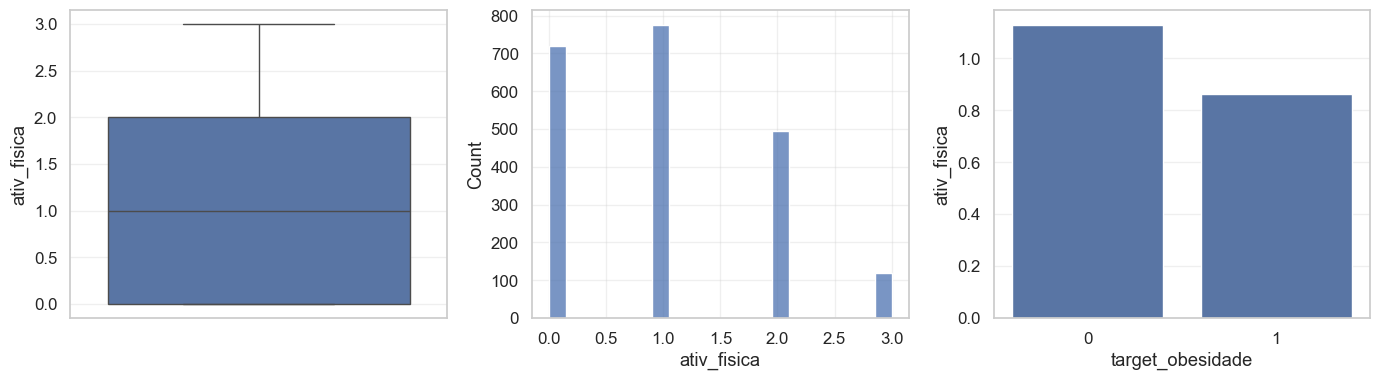

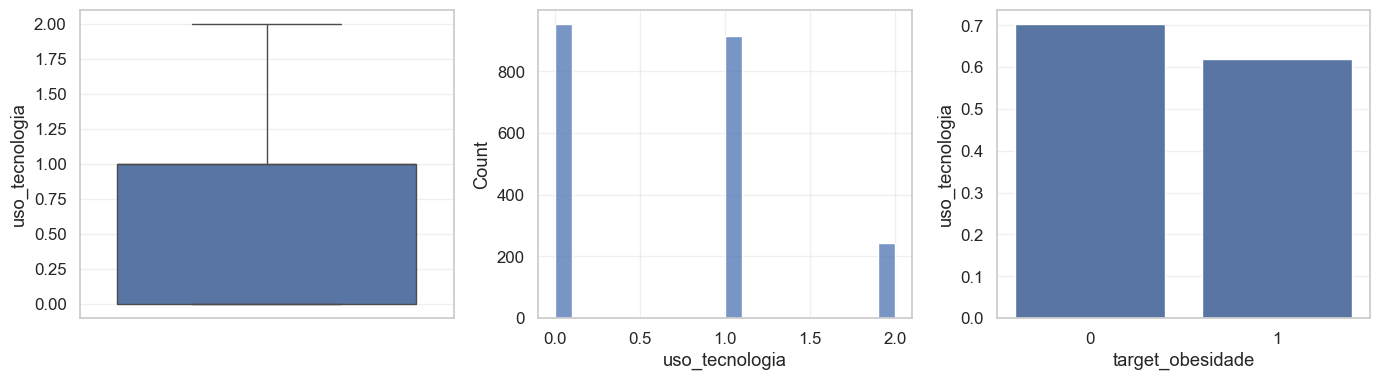

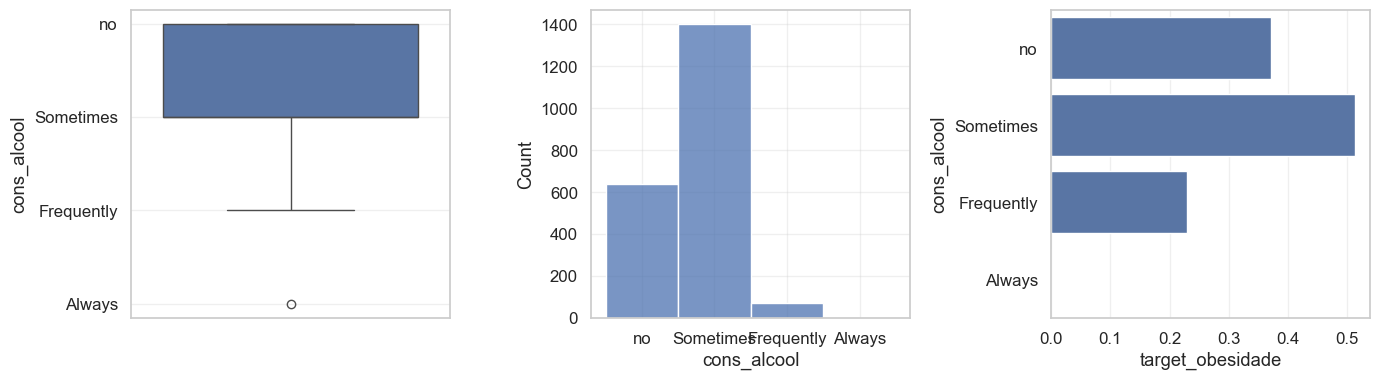

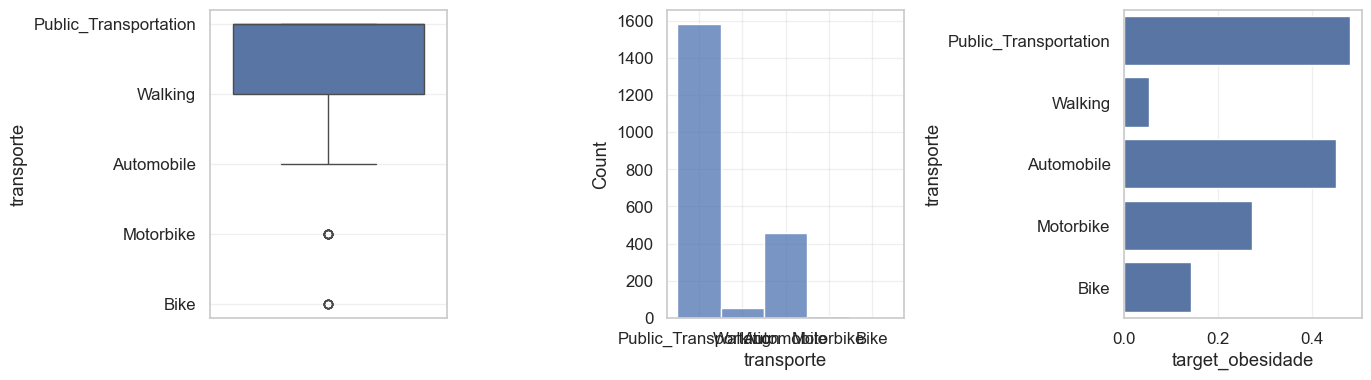

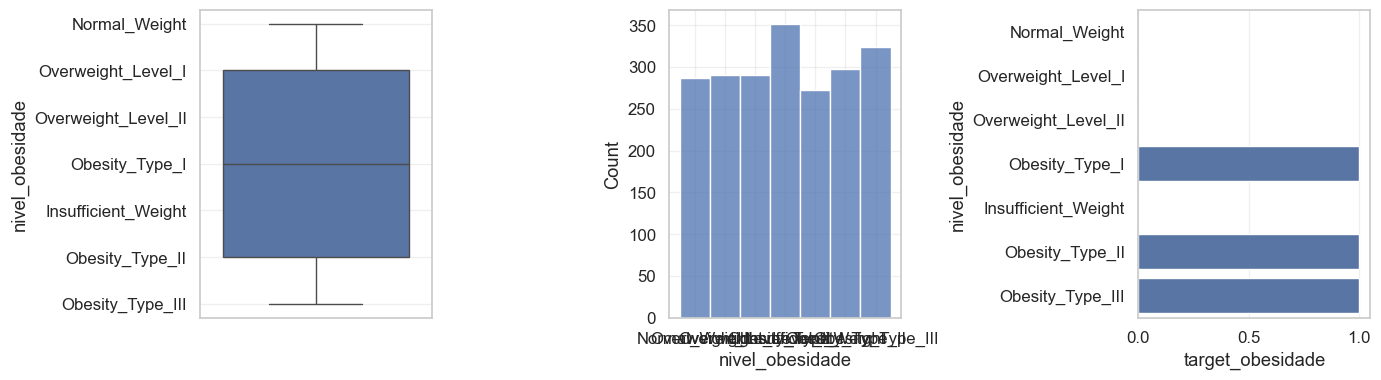

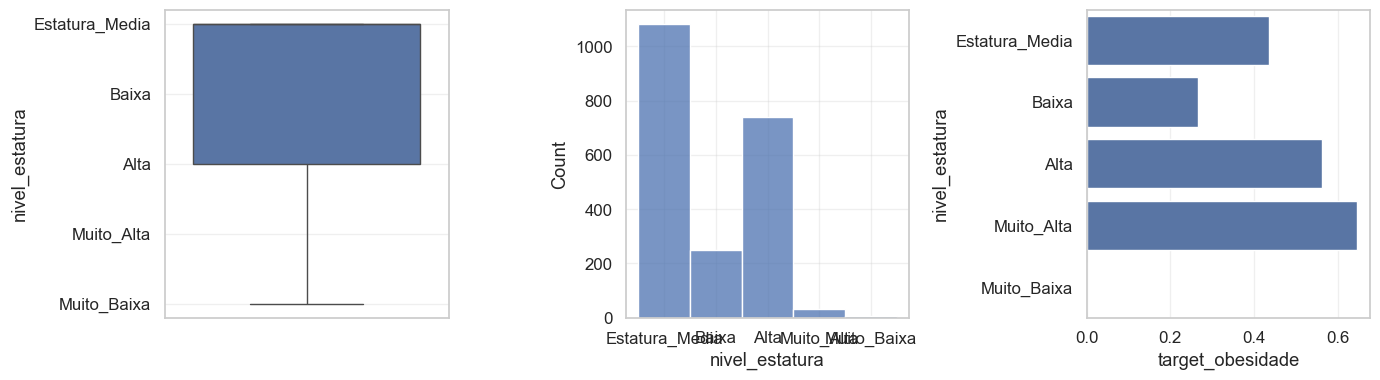

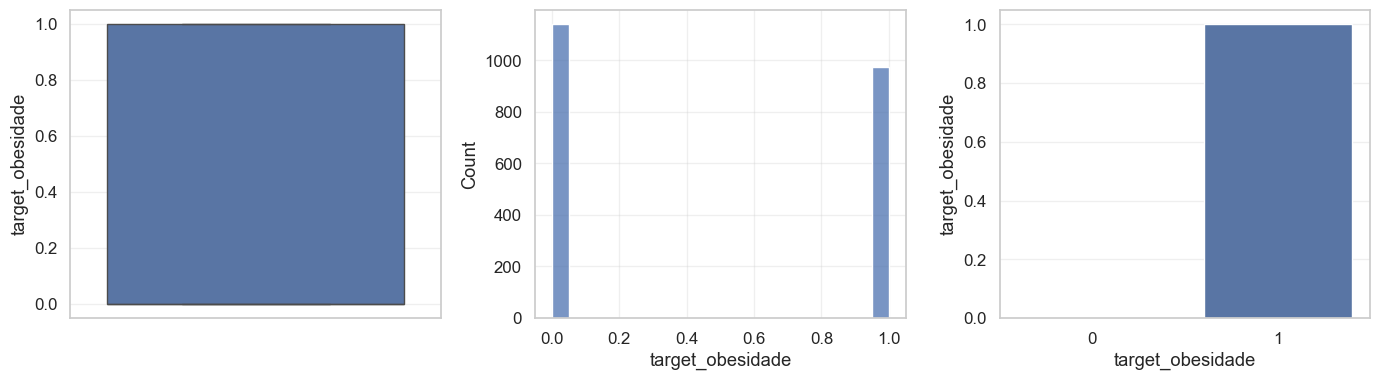

In [56]:
for col in df:
    fig, axis = plt.subplots(1, 3, figsize=(14, 4))
    
    # Boxplot
    sns.boxplot(df, y=col, ax=axis[0])
    
    # Histograma
    if col != ['sexo', 'hist_familiar_obes', 'cons_altas_cal_freq', 'fuma', 'controle_calorias', 'target_obesidade', 'nivel_obesidade', 'nivel_estatura']:
        sns.histplot(df, x=col, bins=20, ax=axis[1])
    
    # Barplot (sem barras de erro)
    barplot = sns.barplot(df, x='target_obesidade', y=col, ax=axis[2], errorbar=None)
    
    #barplot.tick_params(left=False)

    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Matriz de Correlação das Variáveis Numéricas')

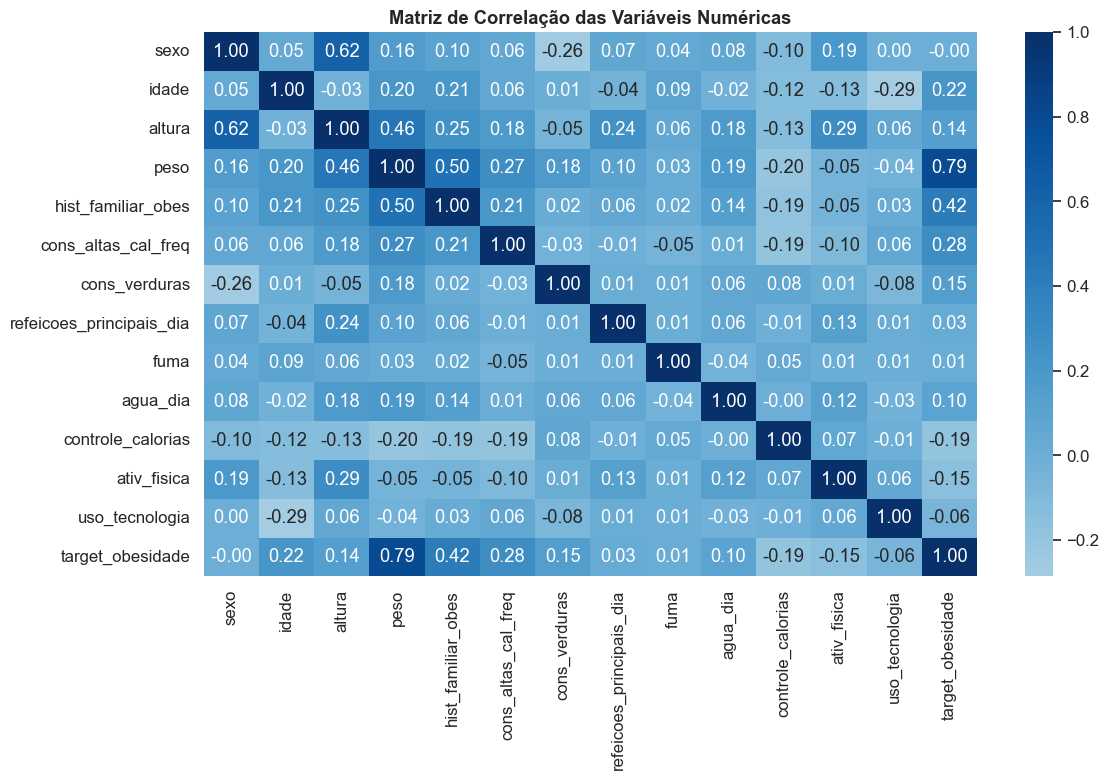

In [57]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', center=0)
plt.title('Matriz de Correlação das Variáveis Numéricas')

#### Possiveis habitos ou genética que pode causar ou não obesidade  
- histórico familiar de obesidade.
- quantidade de refeições diarias.
- consome alimento altamente caloricos com frequência.
- consome vegetais nas refeições.
- altura.
- lancha entre as refeições.
- fuma.
- Consome quanto litros de água dia.
- Prática atividade física frequentemente.
- consome alcool frequentemente.
- Utiliza transporte público.
- Tempo de tela no dispositivo técnologico.

In [16]:
colunas_principais = ['hist_familiar_obes', 'cons_altas_cal_freq', 
                    'refeicoes_principais_dia', 'lancha_entre_ref',
                    'fuma', 'agua_dia', 'ativ_fisica', 'cons_alcool',
                    'transporte', 'target_obesidade', 'nivel_estatura']

In [17]:
df[colunas_principais].value_counts().reset_index().sort_values(by=['target_obesidade', 'count'])

,hist_familiar_obes,cons_altas_cal_freq,refeicoes_principais_dia,lancha_entre_ref,fuma,agua_dia,ativ_fisica,cons_alcool,transporte,target_obesidade,nivel_estatura,count
264,1,1,4,Sometimes,0,3,2,Sometimes,Automobile,0,Alta,1
265,0,0,3,Frequently,0,3,2,no,Public_Transportation,0,Alta,1
266,1,1,3,Sometimes,0,3,3,Sometimes,Public_Transportation,0,Baixa,1
267,1,1,4,Sometimes,0,2,2,Sometimes,Public_Transportation,0,Estatura_Media,1
268,1,1,4,Sometimes,0,2,3,Sometimes,Public_Transportation,0,Alta,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4,1,1,3,Sometimes,0,2,0,Sometimes,Public_Transportation,1,Estatura_Media,43
3,1,1,3,Sometimes,0,2,2,Sometimes,Public_Transportation,1,Alta,48
2,1,1,3,Sometimes,0,3,1,Sometimes,Public_Transportation,1,Alta,53
1,1,1,3,Sometimes,0,2,1,Sometimes,Public_Transportation,1,Alta,78


C:\Users\jacom\AppData\Local\Temp\ipykernel_17400\2350255597.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(df, x='target_obesidade', hue='target_obesidade', palette='Set1', legend=True,hue_order=target_name.keys()).set_xticklabels(['Não Obeso', 'Obeso'])


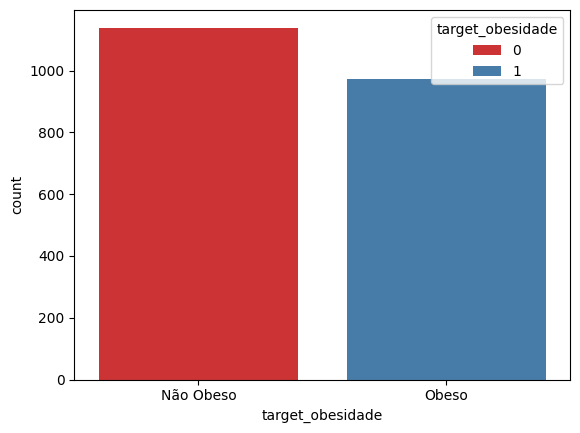

In [18]:
target_name = {
    0: 'Não Obeso',
    1: 'Obeso'
}
sns.countplot(df, x='target_obesidade', hue='target_obesidade', palette='Set1', legend=True,hue_order=target_name.keys()).set_xticklabels(['Não Obeso', 'Obeso'])

plt.show()


## Preparação do dataframe para os modelos preditivos.

In [61]:
df.columns

Index(['sexo', 'idade', 'altura', 'peso', 'hist_familiar_obes',
       'cons_altas_cal_freq', 'cons_verduras', 'refeicoes_principais_dia',
       'lancha_entre_ref', 'fuma', 'agua_dia', 'controle_calorias',
       'ativ_fisica', 'uso_tecnologia', 'cons_alcool', 'transporte',
       'nivel_obesidade', 'nivel_estatura', 'target_obesidade'],
      dtype='object')

In [62]:
df['lancha_entre_ref'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [14]:
df_model = df.copy()

In [15]:
df_model

,sexo,idade,altura,peso,hist_familiar_obes,cons_altas_cal_freq,cons_verduras,refeicoes_principais_dia,lancha_entre_ref,fuma,agua_dia,controle_calorias,ativ_fisica,uso_tecnologia,cons_alcool,transporte,nivel_obesidade,nivel_estatura,target_obesidade
0,0,21,1.62,64.00,1,0,2,3,Sometimes,0,2,0,0,1,no,Public_Transportation,Normal_Weight,Estatura_Media,0
1,0,21,1.52,56.00,1,0,3,3,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight,Baixa,0
2,1,23,1.80,77.00,1,0,2,3,Sometimes,0,2,0,2,1,Frequently,Public_Transportation,Normal_Weight,Alta,0
3,1,27,1.80,87.00,0,0,3,3,Sometimes,0,2,0,2,0,Frequently,Walking,Overweight_Level_I,Alta,0
4,1,22,1.78,89.80,0,0,2,1,Sometimes,0,2,0,0,0,Sometimes,Public_Transportation,Overweight_Level_II,Alta,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3,3,Sometimes,0,2,0,2,1,Sometimes,Public_Transportation,Obesity_Type_III,Estatura_Media,1
2107,0,22,1.75,133.74,1,1,3,3,Sometimes,0,2,0,1,1,Sometimes,Public_Transportation,Obesity_Type_III,Alta,1
2108,0,23,1.75,133.69,1,1,3,3,Sometimes,0,2,0,1,1,Sometimes,Public_Transportation,Obesity_Type_III,Alta,1
2109,0,24,1.74,133.35,1,1,3,3,Sometimes,0,3,0,1,1,Sometimes,Public_Transportation,Obesity_Type_III,Estatura_Media,1


In [19]:
# Criação do mapeamento dos níveis detalhados para os 4 principais grupos
# Lancha entre as refeições
frequencias = {
    'no': 0,
    'Sometimes': 0,
    'Frequently': 1,
    'Always': 1
}

# Pratica atividade física
ativ_fisica = {
    0: 0,
    1: 0,
    2: 1,
    3: 1,
    4: 1
}

# Utiliza transporte público
auto_transporte = {
    'Automobile': 1,
    'Motorbike': 1,
    'Public_Transportation': 1,
    'Bike': 0,
    'Walking': 0
}

# Cria a nova coluna 'lancha_entre_ref_bin'
df_model['lancha_entre_ref_bin'] = df_model['lancha_entre_ref'].map(frequencias)

# Cria a nova coluna 'cons_alcool_bin'
df_model['cons_alcool_bin'] = df_model['cons_alcool'].map(frequencias)

# Cria a nova coluna 'ativ_fisica_bin'
df_model['ativ_fisica_bin'] = df_model['ativ_fisica'].map(ativ_fisica)

# Cria a nova coluna 'transporte_bin'
df_model['trasporte_bin'] = df_model['transporte'].map(auto_transporte)

In [20]:
df_model

,sexo,idade,altura,peso,hist_familiar_obes,cons_altas_cal_freq,cons_verduras,refeicoes_principais_dia,lancha_entre_ref,fuma,...,uso_tecnologia,cons_alcool,transporte,nivel_obesidade,nivel_estatura,target_obesidade,lancha_entre_ref_bin,cons_alcool_bin,ativ_fisica_bin,trasporte_bin
0,0,21,1.62,64.00,1,0,2,3,Sometimes,0,...,1,no,Public_Transportation,Normal_Weight,Estatura_Media,0,0,0,0,1
1,0,21,1.52,56.00,1,0,3,3,Sometimes,1,...,0,Sometimes,Public_Transportation,Normal_Weight,Baixa,0,0,0,1,1
2,1,23,1.80,77.00,1,0,2,3,Sometimes,0,...,1,Frequently,Public_Transportation,Normal_Weight,Alta,0,0,1,1,1
3,1,27,1.80,87.00,0,0,3,3,Sometimes,0,...,0,Frequently,Walking,Overweight_Level_I,Alta,0,0,1,1,0
4,1,22,1.78,89.80,0,0,2,1,Sometimes,0,...,0,Sometimes,Public_Transportation,Overweight_Level_II,Alta,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3,3,Sometimes,0,...,1,Sometimes,Public_Transportation,Obesity_Type_III,Estatura_Media,1,0,0,1,1
2107,0,22,1.75,133.74,1,1,3,3,Sometimes,0,...,1,Sometimes,Public_Transportation,Obesity_Type_III,Alta,1,0,0,0,1
2108,0,23,1.75,133.69,1,1,3,3,Sometimes,0,...,1,Sometimes,Public_Transportation,Obesity_Type_III,Alta,1,0,0,0,1
2109,0,24,1.74,133.35,1,1,3,3,Sometimes,0,...,1,Sometimes,Public_Transportation,Obesity_Type_III,Estatura_Media,1,0,0,0,1


In [67]:
df_model.columns

Index(['sexo', 'idade', 'altura', 'peso', 'hist_familiar_obes',
       'cons_altas_cal_freq', 'cons_verduras', 'refeicoes_principais_dia',
       'lancha_entre_ref', 'fuma', 'agua_dia', 'controle_calorias',
       'ativ_fisica', 'uso_tecnologia', 'cons_alcool', 'transporte',
       'nivel_obesidade', 'nivel_estatura', 'target_obesidade',
       'lancha_entre_ref_bin', 'cons_alcool_bin', 'ativ_fisica_bin',
       'trasporte_bin'],
      dtype='object')

In [21]:
df_model_final = df_model[['hist_familiar_obes', 'cons_altas_cal_freq', 'cons_verduras', 
            'refeicoes_principais_dia', 'lancha_entre_ref_bin', 'fuma', 'agua_dia', 
            'controle_calorias', 'ativ_fisica_bin', 'uso_tecnologia', 'cons_alcool_bin', 
            'trasporte_bin', 'target_obesidade']]

#### Salvar DataFrame Final para Modelos de Previsão.

In [22]:
pd.DataFrame.to_csv(df_model_final, '..\data\df_model_final.csv', index=False)